In [1]:
import os
import glob
import json
import pandas as pd
import numpy as np

from itertools import groupby
from collections import Counter
from os.path import exists

In [2]:
def IssuerCode(state=False):
    issuers = pd.read_csv('data/list_of_issuer-20230322.csv',sep=';')
    issuer_filtered = []
    for code_stock in issuers.Code:
        # Check last transaction 2023
        # Have 200 transaction
        path = f'data/history/{code_stock}.csv'
        if os.path.exists(path):
            historical = pd.read_csv(path)
            last_date_row = historical.Date.iloc[len(historical)-1] # get last date transactions
            data_test = historical[len(historical)-(int(len(historical)*0.2)):]['Close'] # get data test
            var = np.var(data_test) # calculate variance from data test
            if (last_date_row[:4] == '2023' and len(historical) >= 200 and var > 0):
                issuer_filtered.append(code_stock)
    
    if state:
        print("Code of Stock Issuer: {}".format(issuer_filtered))
    else:
        return issuer_filtered

In [3]:
issuers = IssuerCode()

In [4]:
# read profile stock
def_sectors = ['Barang Baku','Barang Konsumen Non-Primer','Barang Konsumen Primer','Energi','Keuangan','Kesehatan','Perindustrian','Infrastruktur','Properti','Teknologi','Transportasi',]

undefined_sectors = ['PROPERTY, REAL ESTATE AND BUILDING CONSTRUCTION', 
                     'Transportasi & Logistik', 
                     'Financials', 
                     'MISCELLANEOUS INDUSTRY', 
                     'Consumer Cyclicals', 
                     'Properties & Real Estate', 
                     'INFRASTRUCTURE, UTILITIES  AND TRANSPORTATION', 
                     'BASIC INDUSTRY AND CHEMICALS', 
                     'TRADE, SERVICES & INVESTMENT', 
                     'CONSUMER GOODS INDUSTRY', 
                     'Properti & Real Estat']

path_profile = 'data/profile/'
path_transaction = 'data/history/'

issuer_sectors = {'code':[],'sector':[],'len':[]}

for issuer in issuers:
    filename = f'{path_profile}/{issuer}.json'
    profiles = json.load(open(filename))
    
    path = f'{path_transaction}{issuer}.csv'
    if exists(path):
        historical = pd.read_csv(path)
    
    if issuer in ['BOLT','RICY','INDS']:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif issuer == 'IKBI':
        profiles['Profiles'][0]['Sektor'] = 'Perindustrian'    
    elif issuer == 'RIMO':
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[:2]:
        profiles['Profiles'][0]['Sektor'] = 'Transportasi'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[2]:
        profiles['Profiles'][0]['Sektor'] = 'Keuangan'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[4]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[5]:
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[6]:
        profiles['Profiles'][0]['Sektor'] = 'Transportasi'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[7]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Baku'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[9]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[10]:
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    
    if profiles['Profiles'][0]['Sektor'] not in undefined_sectors:
        issuer_sectors['code'].append(issuer)
        issuer_sectors['sector'].append(profiles['Profiles'][0]['Sektor'])
        issuer_sectors['len'].append(len(historical))
    else:
        print(profiles['Profiles'][0]['Sektor'])

# sectors = sorted(list(set(issuer_sectors['sector'])))
# print(sectors)
# print(len(issuer_sectors['code']))

In [5]:
# Sort the data by the 'sector' key
sorted_data = sorted(zip(issuer_sectors['sector'], issuer_sectors['code']))

# Group the data by the 'sector' key
grouped_data = groupby(sorted_data, key=lambda x: x[0])

# Create a new dictionary to store the grouped data
grouped_sectors = {}

# Iterate over the grouped data and store it in the new dictionary
for sector, group in grouped_data:
    codes = [item[1] for item in group]
    grouped_sectors[sector] = codes

print(grouped_sectors)

{'Barang Baku': ['ADMG', 'AGII', 'AKPI', 'ALDO', 'ALKA', 'ALMI', 'ANTM', 'APLI', 'ARCI', 'AVIA', 'AYLS', 'BAJA', 'BEBS', 'BMSR', 'BRMS', 'BRNA', 'BRPT', 'BTON', 'CITA', 'CLPI', 'CMNT', 'CTBN', 'DKFT', 'DPNS', 'EKAD', 'ESIP', 'ESSA', 'FASW', 'FPNI', 'GDST', 'GGRP', 'IFII', 'IFSH', 'IGAR', 'INAI', 'INCF', 'INCI', 'INCO', 'INKP', 'INRU', 'INTD', 'INTP', 'IPOL', 'ISSP', 'JKSW', 'KAYU', 'KDSI', 'KMTR', 'KRAS', 'LMSH', 'LTLS', 'MDKA', 'MDKI', 'MOLI', 'NICL', 'NIKL', 'NPGF', 'OBMD', 'OKAS', 'OPMS', 'PBID', 'PICO', 'PNGO', 'PSAB', 'PURE', 'SAMF', 'SBMA', 'SIMA', 'SMBR', 'SMCB', 'SMGR', 'SMKL', 'SPMA', 'SQMI', 'SRSN', 'SULI', 'SWAT', 'TALF', 'TBMS', 'TINS', 'TIRT', 'TKIM', 'TPIA', 'TRST', 'UNIC', 'WSBP', 'WTON', 'YPAS', 'ZINC'], 'Barang Konsumen Non-Primer': ['ABBA', 'ACES', 'AKKU', 'ARGO', 'ARTA', 'ASLC', 'AUTO', 'BATA', 'BAYU', 'BELL', 'BIKE', 'BIMA', 'BLTZ', 'BOGA', 'BOLA', 'BOLT', 'BRAM', 'BUVA', 'CARS', 'CBMF', 'CINT', 'CLAY', 'CNTX', 'CSAP', 'DEPO', 'DFAM', 'DIGI', 'DRMA', 'EAST', 'ECII',

In [6]:
sector_counts = Counter(issuer_sectors['sector'])
print(sector_counts)

Counter({'Barang Konsumen Non-Primer': 121, 'Keuangan': 103, 'Barang Konsumen Primer': 97, 'Barang Baku': 89, 'Properti': 69, 'Energi': 67, 'Infrastruktur': 52, 'Perindustrian': 51, 'Teknologi': 29, 'Transportasi': 25, 'Kesehatan': 24})


In [7]:
sum_by_sector = {}
sector_counter = Counter()

for code, sector, length in zip(issuer_sectors['code'], issuer_sectors['sector'], issuer_sectors['len']):
    if sector not in sum_by_sector:
        sum_by_sector[sector] = 0
    sum_by_sector[sector] += length
    sector_counter[sector] += 1

print(dict(sorted(sum_by_sector.items())))
print(dict(sorted(sector_counter.items())))


{'Barang Baku': 308749, 'Barang Konsumen Non-Primer': 362480, 'Barang Konsumen Primer': 283436, 'Energi': 195815, 'Infrastruktur': 133130, 'Kesehatan': 61862, 'Keuangan': 364663, 'Perindustrian': 171737, 'Properti': 209202, 'Teknologi': 43319, 'Transportasi': 60955}
{'Barang Baku': 89, 'Barang Konsumen Non-Primer': 121, 'Barang Konsumen Primer': 97, 'Energi': 67, 'Infrastruktur': 52, 'Kesehatan': 24, 'Keuangan': 103, 'Perindustrian': 51, 'Properti': 69, 'Teknologi': 29, 'Transportasi': 25}


In [8]:
issuer_result = {'code':[],'sector':[],'lookback':[],'arch':[],'r2':[],'mse':[],'rmse':[],'mape':[],'acc':[],'f1':[]}

lookbacks = [5]
architecture = ['TFCNN','TFCNNGRU','TFCNNLSTM','TFGRU','TFGRUCNN','TFGRULSTM','TFLSTM','TFLSTMCNN','TFLSTMGRU','TFGCNGRU','TFGCNLSTM','TFCNNGRULSTM','TFCNNLSTMGRU','TFLSTMGRUCNN','TFLSTMCNNGRU','TFGRULSTMCNN','TFGRUCNNLSTM']

path_result = 'results/evaluations/'

for code, sector in zip(issuer_sectors['code'], issuer_sectors['sector']):
    for archi in architecture:
        for lookback in lookbacks:
            if 'GCN' in archi:
                path_score = f'{path_result}{archi}_multivariate_graph/{code}_{lookback}_test_score.json'
                path_class = f'{path_result}{archi}_multivariate_graph/{code}_{lookback}_test_classification.json'
            else:
                path_score = f'{path_result}{archi}_multivariate/{code}_{lookback}_test_score.json'
                path_class = f'{path_result}{archi}_multivariate/{code}_{lookback}_test_classification.json'
            
            score_json = json.load(open(path_score))
            class_json = json.load(open(path_class))
            
            issuer_result['code'].append(code)
            issuer_result['sector'].append(sector)
            issuer_result['lookback'].append(lookback)
            issuer_result['arch'].append(archi)
            issuer_result['r2'].append(score_json['R2'])
            issuer_result['mse'].append(score_json['MSE'])
            issuer_result['rmse'].append(score_json['RMSE'])
            issuer_result['mape'].append(score_json['MAPE'])
            issuer_result['acc'].append(class_json['accuracy'])
            issuer_result['f1'].append(class_json['macro avg']['f1-score'] if 'macro avg' in class_json else 0)
            

In [9]:
df_result = pd.DataFrame(issuer_result)
df_averages = df_result.groupby(['code', 'sector', 'arch'], as_index=False).mean()[['code', 'sector', 'arch', 'r2', 'mse', 'rmse', 'mape', 'acc', 'f1']]

best_arch_r2 = df_averages.loc[df_averages.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch_mse = df_averages.loc[df_averages.groupby(['code', 'sector'])['mse'].idxmin()]
best_arch_rmse = df_averages.loc[df_averages.groupby(['code', 'sector'])['rmse'].idxmin()]
best_arch_mape = df_averages.loc[df_averages.groupby(['code', 'sector'])['mape'].idxmin()]
best_arch_acc = df_averages.loc[df_averages.groupby(['code', 'sector'])['acc'].idxmin()]
best_arch_f1 = df_averages.loc[df_averages.groupby(['code', 'sector'])['f1'].idxmax()]

df_best = pd.concat([best_arch_r2, best_arch_mse, best_arch_rmse, best_arch_mape, best_arch_acc, best_arch_f1])

df_best_arch = df_best.groupby(['code', 'sector', 'arch'], as_index=False).count()[['code', 'sector', 'arch', 'r2']]
best_arch = df_best_arch.loc[df_best_arch.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch = best_arch.rename(columns={'r2': 'count'})
best_arch_count = best_arch.groupby(['arch'], as_index=False).count()[['arch','count']]

            arch  count
3      TFCNNLSTM      5
8       TFGRUCNN      7
14  TFLSTMCNNGRU      7
6      TFGCNLSTM      8
1       TFCNNGRU      9
9   TFGRUCNNLSTM      9
5       TFGCNGRU     11
4   TFCNNLSTMGRU     13
13     TFLSTMCNN     13
16  TFLSTMGRUCNN     18
2   TFCNNGRULSTM     19
11  TFGRULSTMCNN     23
0          TFCNN     69
12        TFLSTM     87
15     TFLSTMGRU    113
10     TFGRULSTM    118
7          TFGRU    198


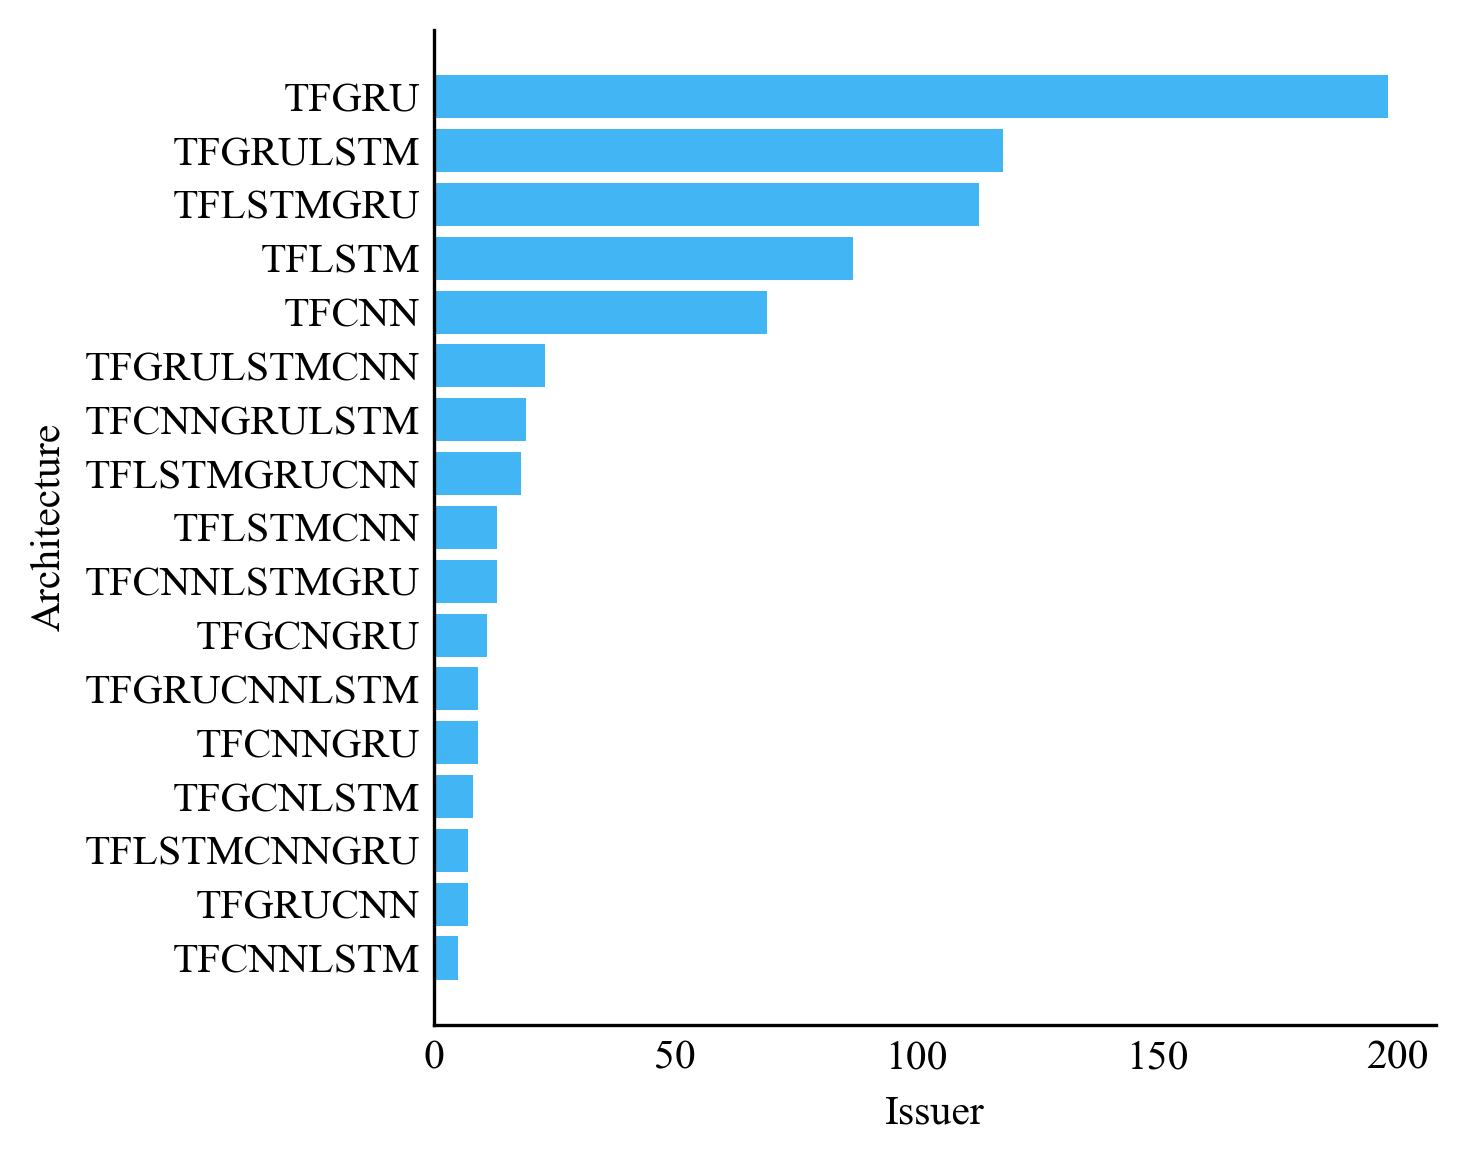

In [10]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

# bar_colors = ['#4287f5', '#42f5a3', '#f54242', '#f5d142', '#a342f5', '#f57f42', '#42b6f5', '#f542c6', '#42f5e9', '#c6f542', '#f5bc42']
df = best_arch_count.sort_values('count', ascending=True)
print(df)
plt.barh(df['arch'], df['count'], color='#42b6f5')
plt.xlabel('Issuer')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

In [11]:
print(df_result.dtypes)

code         object
sector       object
lookback      int64
arch         object
r2          float64
mse         float64
rmse        float64
mape        float64
acc         float64
f1          float64
dtype: object


In [12]:
df_result = pd.DataFrame(issuer_result)
df_averages_score = df_result.groupby(['arch'], as_index=False).mean(numeric_only=True)[['arch', 'r2', 'mse', 'rmse', 'mape', 'acc', 'f1']]
df_averages_score.to_excel('df_averages_score.xlsx', index=False)

            arch         r2           mse         rmse       mape       acc  \
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
15     TFLSTMGRU -80.521402  1.528528e+08   609.626930   1.274795  0.532835   
13     TFLSTMCNN -63.428660  1.729467e+08   647.893435   1.277562  0.494668   
1       TFCNNGRU -63.242644  7.424301e+07   499.633660   0.226820  0.513873   
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
10     TFGRULSTM -51.171449  1.471566e+08   606.894829   1.210173  0.518385   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
8       TFGRUCNN -36.864204  4.756491e+08   968.176059   2.525143  0.510071   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.068937   2.937968  0.501689   
12        TFLSTM -28.188471  3.244545e+08   817.654383   2.107594  0.513769   
7          TFGRU -22.913112  9.260941e+07   500.6462

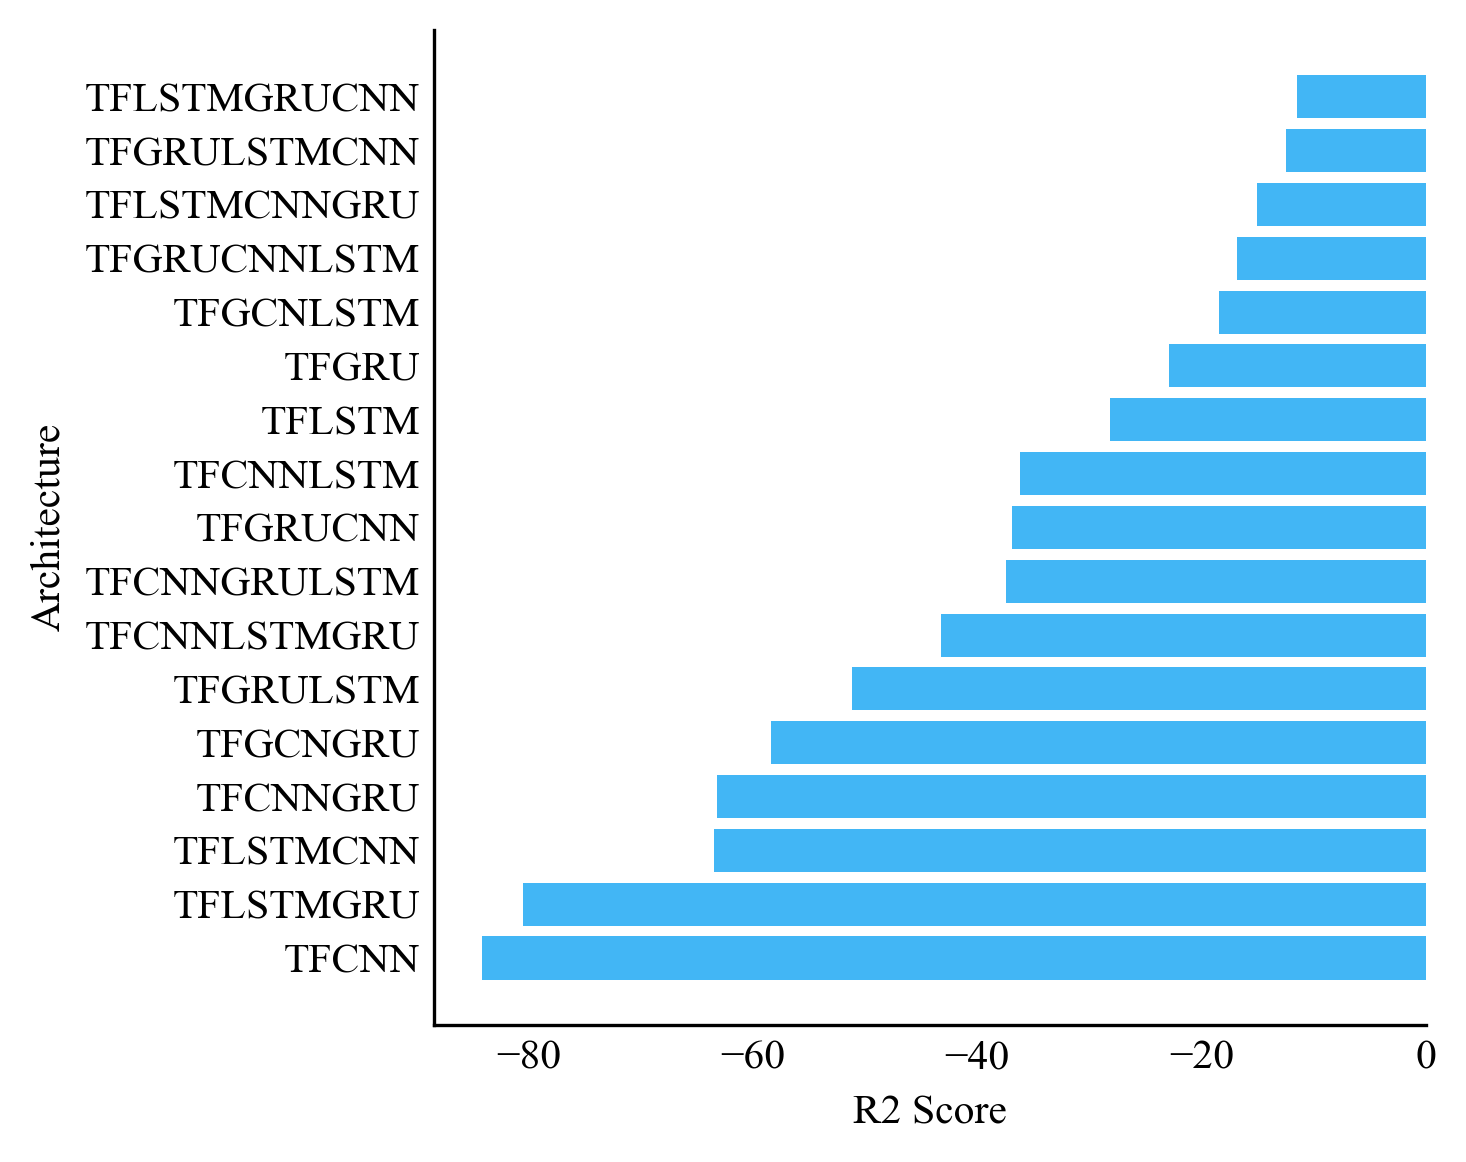

In [13]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('r2', ascending=True)
print(df)
plt.barh(df['arch'], df['r2'], color='#42b6f5')
plt.xlabel('R2 Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

            arch         r2           mse         rmse       mape       acc  \
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
6      TFGCNLSTM -18.411336  9.524900e+09  3878.810527  11.820778  0.502074   
9   TFGRUCNNLSTM -16.843269  1.286898e+09  1544.075690   4.401315  0.462265   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
14  TFLSTMCNNGRU -15.008338  7.895826e+08  1244.786663   3.396764  0.473218   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.068937   2.937968  0.501689   
16  TFLSTMGRUCNN -11.452358  4.860659e+08   993.773572   2.560766  0.471514   
8       TFGRUCNN -36.864204  4.756491e+08   968.176059   2.525143  0.510071   
12        TFLSTM -28.188471  3.244545e+08   817.654383   2.107594  0.513769   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
13     TFLSTMCNN -63.428660  1.729467e+08   647.8934

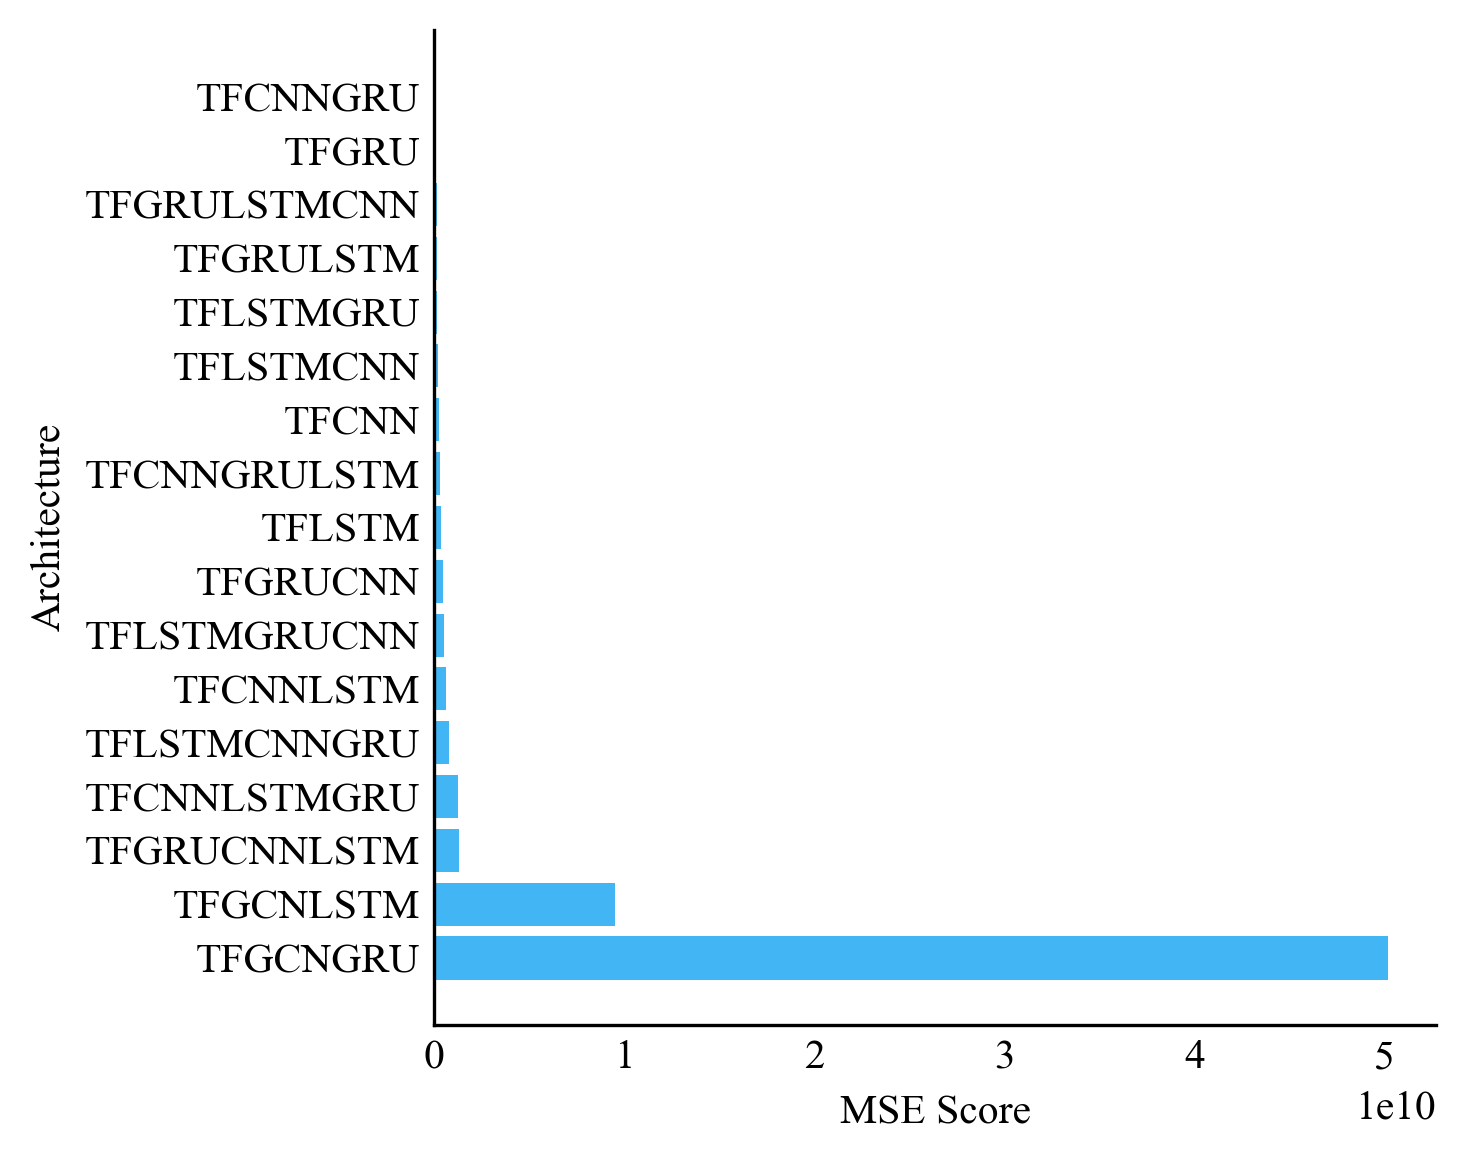

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('mse', ascending=False)
print(df)
plt.barh(df['arch'], df['mse'], color='#42b6f5')
plt.xlabel('MSE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

            arch         r2           mse         rmse       mape       acc  \
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
6      TFGCNLSTM -18.411336  9.524900e+09  3878.810527  11.820778  0.502074   
9   TFGRUCNNLSTM -16.843269  1.286898e+09  1544.075690   4.401315  0.462265   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
14  TFLSTMCNNGRU -15.008338  7.895826e+08  1244.786663   3.396764  0.473218   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.068937   2.937968  0.501689   
16  TFLSTMGRUCNN -11.452358  4.860659e+08   993.773572   2.560766  0.471514   
8       TFGRUCNN -36.864204  4.756491e+08   968.176059   2.525143  0.510071   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
12        TFLSTM -28.188471  3.244545e+08   817.654383   2.107594  0.513769   
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
13     TFLSTMCNN -63.428660  1.729467e+08   647.8934

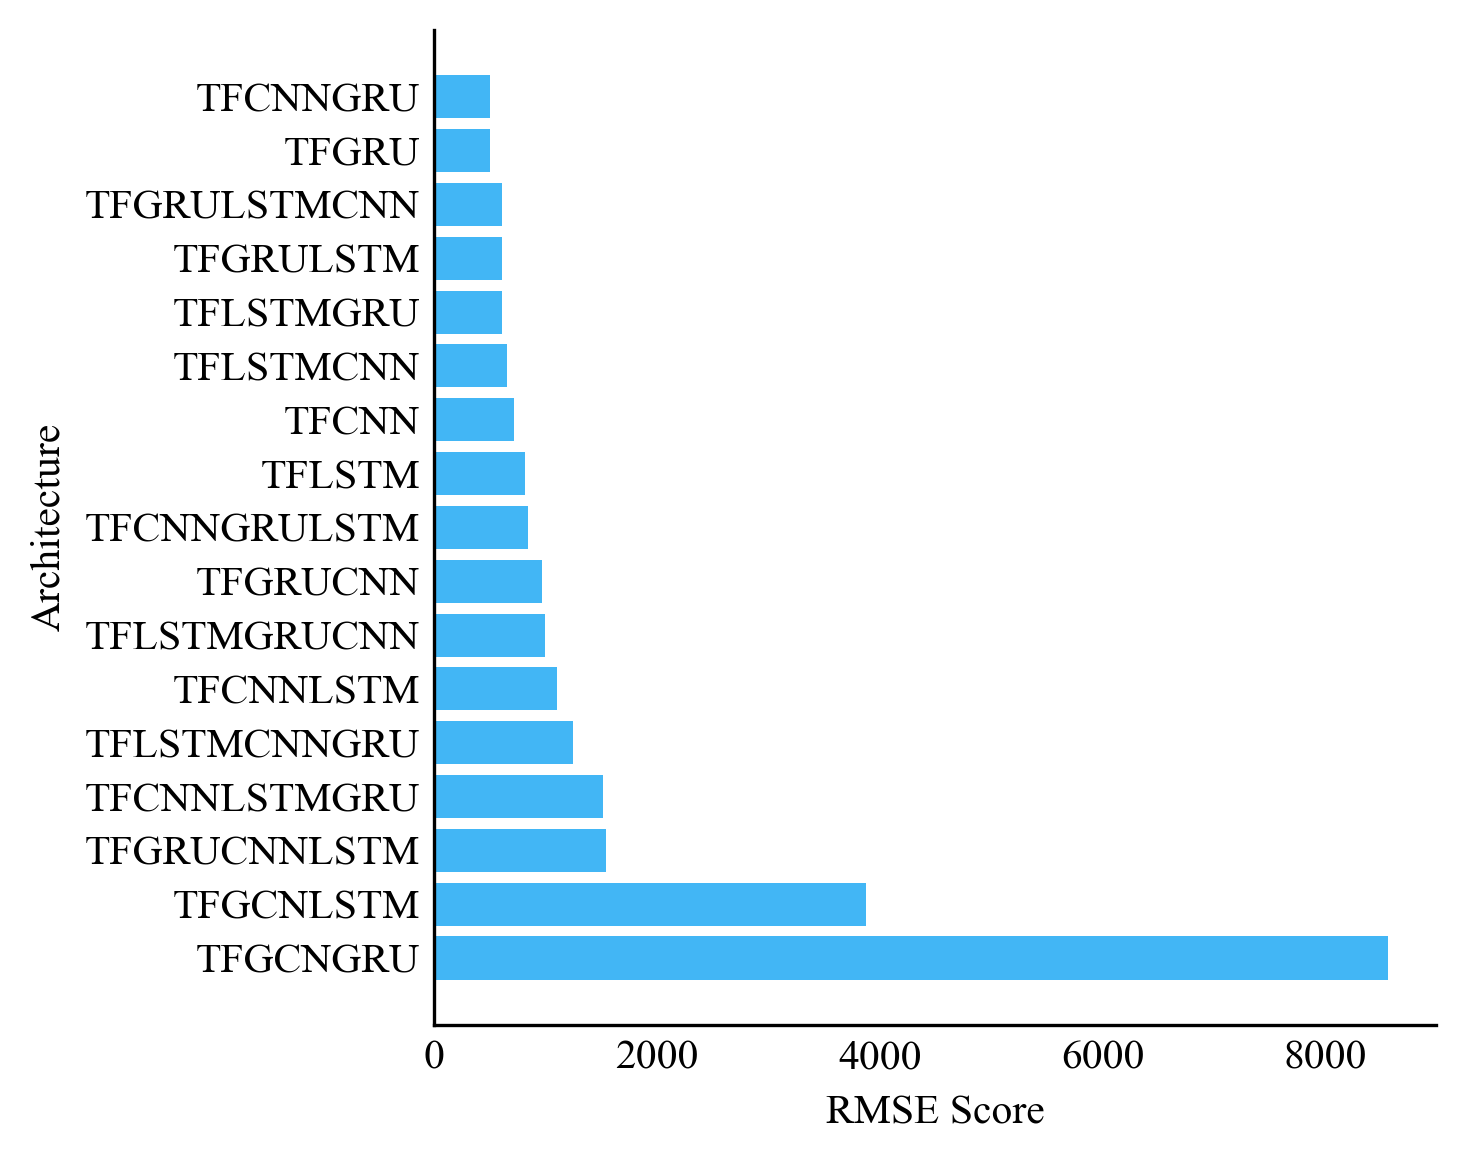

In [15]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('rmse', ascending=False)
print(df)
plt.barh(df['arch'], df['rmse'], color='#42b6f5')
plt.xlabel('RMSE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

            arch         r2           mse         rmse       mape       acc  \
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
6      TFGCNLSTM -18.411336  9.524900e+09  3878.810527  11.820778  0.502074   
9   TFGRUCNNLSTM -16.843269  1.286898e+09  1544.075690   4.401315  0.462265   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
14  TFLSTMCNNGRU -15.008338  7.895826e+08  1244.786663   3.396764  0.473218   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.068937   2.937968  0.501689   
16  TFLSTMGRUCNN -11.452358  4.860659e+08   993.773572   2.560766  0.471514   
8       TFGRUCNN -36.864204  4.756491e+08   968.176059   2.525143  0.510071   
12        TFLSTM -28.188471  3.244545e+08   817.654383   2.107594  0.513769   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
13     TFLSTMCNN -63.428660  1.729467e+08   647.8934

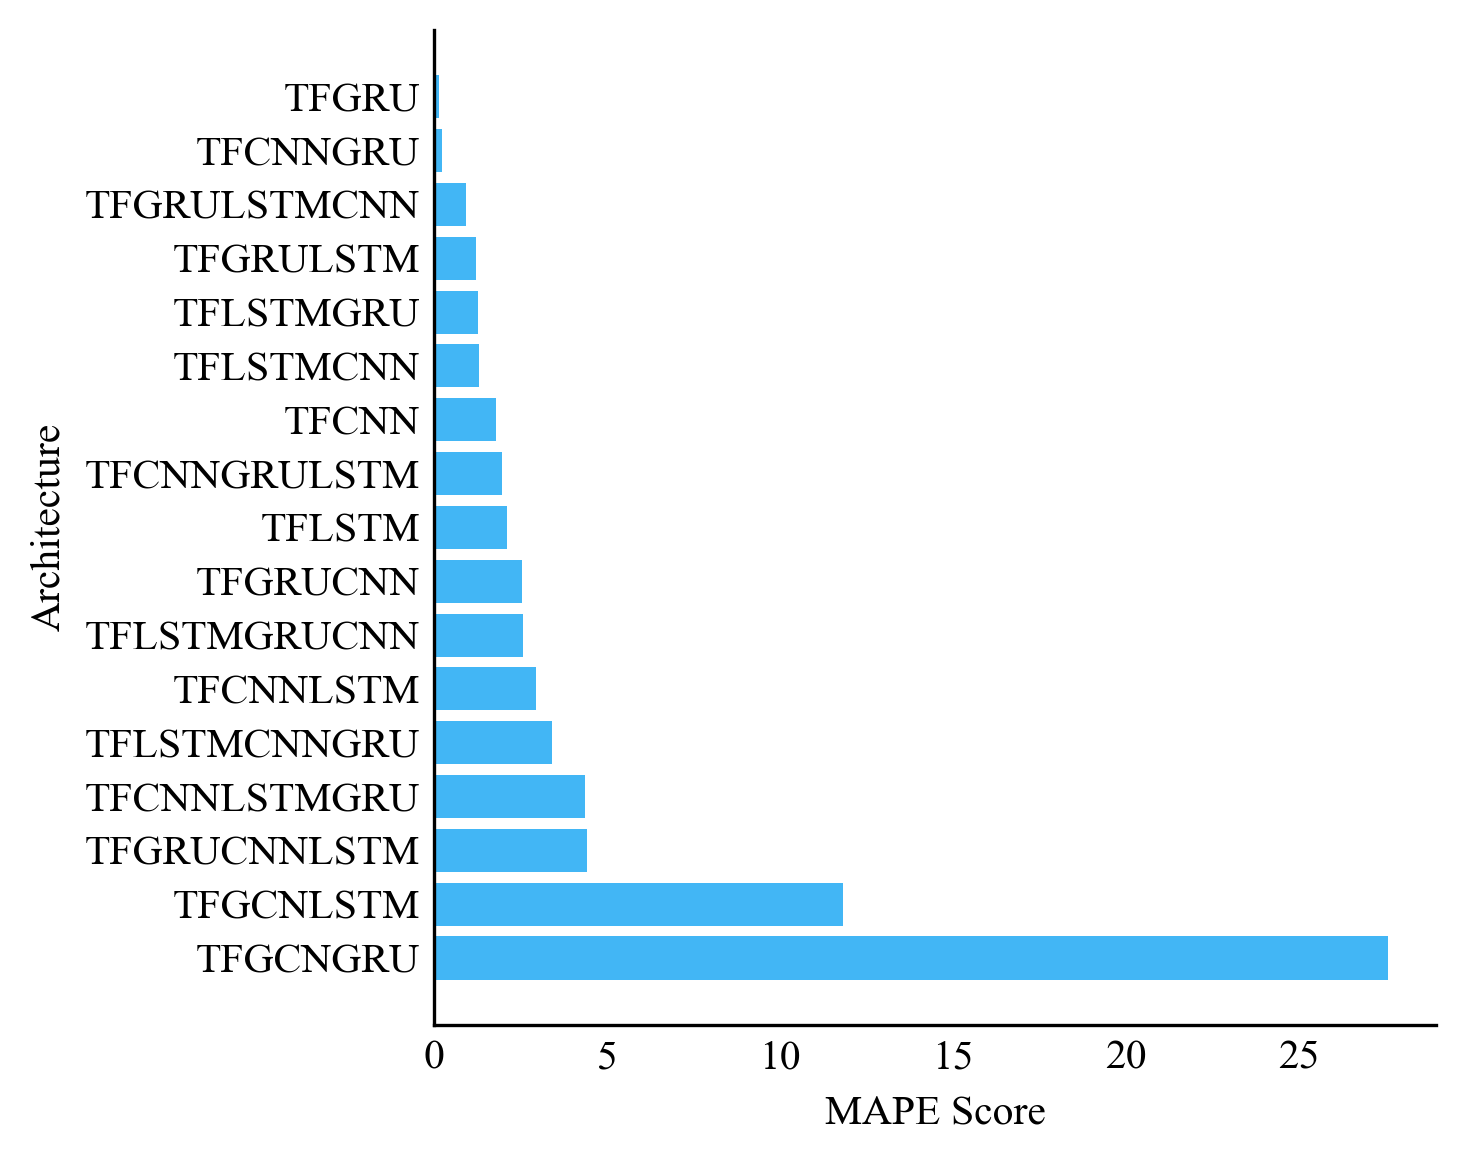

In [16]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('mape', ascending=False)
print(df)
plt.barh(df['arch'], df['mape'], color='#42b6f5')
plt.xlabel('MAPE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

            arch         r2           mse         rmse       mape       acc  \
9   TFGRUCNNLSTM -16.843269  1.286898e+09  1544.075690   4.401315  0.462265   
11  TFGRULSTMCNN -12.413223  1.341180e+08   603.325700   0.902861  0.470758   
16  TFLSTMGRUCNN -11.452358  4.860659e+08   993.773572   2.560766  0.471514   
14  TFLSTMCNNGRU -15.008338  7.895826e+08  1244.786663   3.396764  0.473218   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
13     TFLSTMCNN -63.428660  1.729467e+08   647.893435   1.277562  0.494668   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.068937   2.937968  0.501689   
6      TFGCNLSTM -18.411336  9.524900e+09  3878.810527  11.820778  0.502074   
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
8       TFGRUCNN -36.864204  4.756491e+08   968.1760

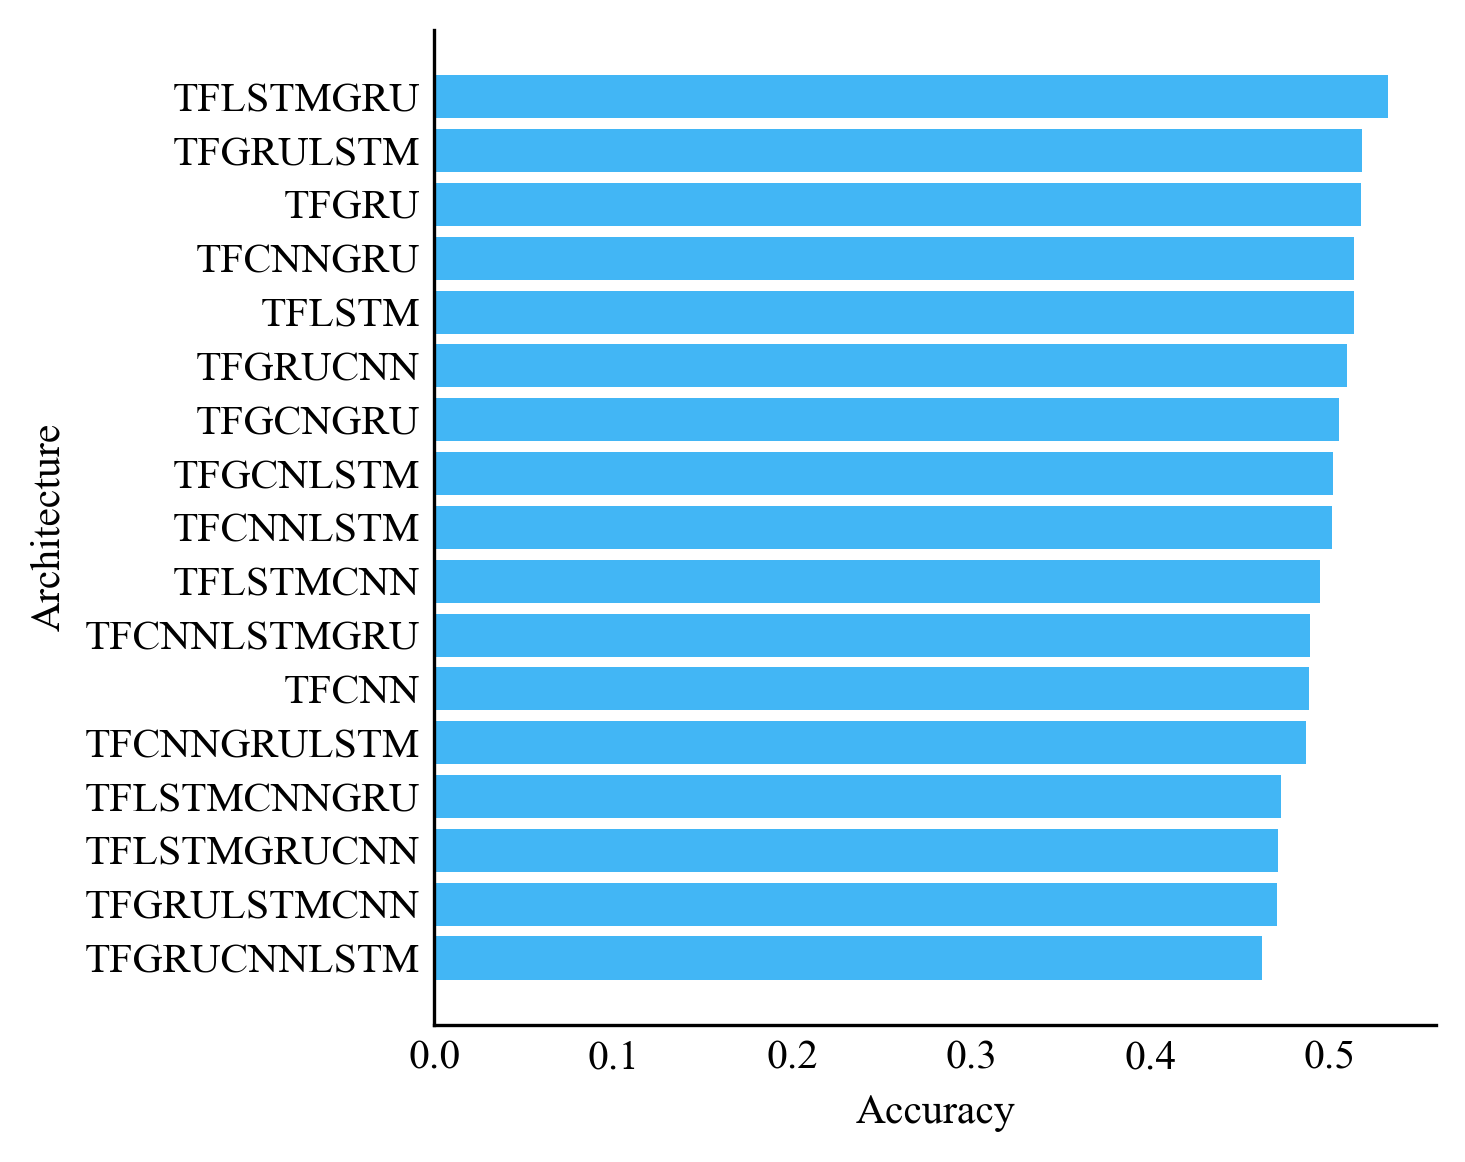

In [17]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('acc', ascending=True)
print(df)
plt.barh(df['arch'], df['acc'], color='#42b6f5')
plt.xlabel('Accuracy')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

            arch         r2           mse         rmse       mape       acc  \
9   TFGRUCNNLSTM -16.843269  1.286898e+09  1544.075690   4.401315  0.462265   
14  TFLSTMCNNGRU -15.008338  7.895826e+08  1244.786663   3.396764  0.473218   
16  TFLSTMGRUCNN -11.452358  4.860659e+08   993.773572   2.560766  0.471514   
11  TFGRULSTMCNN -12.413223  1.341180e+08   603.325700   0.902861  0.470758   
2   TFCNNGRULSTM -37.437585  2.862064e+08   840.745295   1.945435  0.487085   
13     TFLSTMCNN -63.428660  1.729467e+08   647.893435   1.277562  0.494668   
4   TFCNNLSTMGRU -43.256081  1.243310e+09  1516.530752   4.360850  0.488983   
8       TFGRUCNN -36.864204  4.756491e+08   968.176059   2.525143  0.510071   
6      TFGCNLSTM -18.411336  9.524900e+09  3878.810527  11.820778  0.502074   
5       TFGCNGRU -58.368091  5.019094e+10  8566.331907  27.578501  0.505306   
0          TFCNN -84.205383  2.514876e+08   713.592682   1.788719  0.488352   
3      TFCNNLSTM -36.199800  5.926596e+08  1097.0689

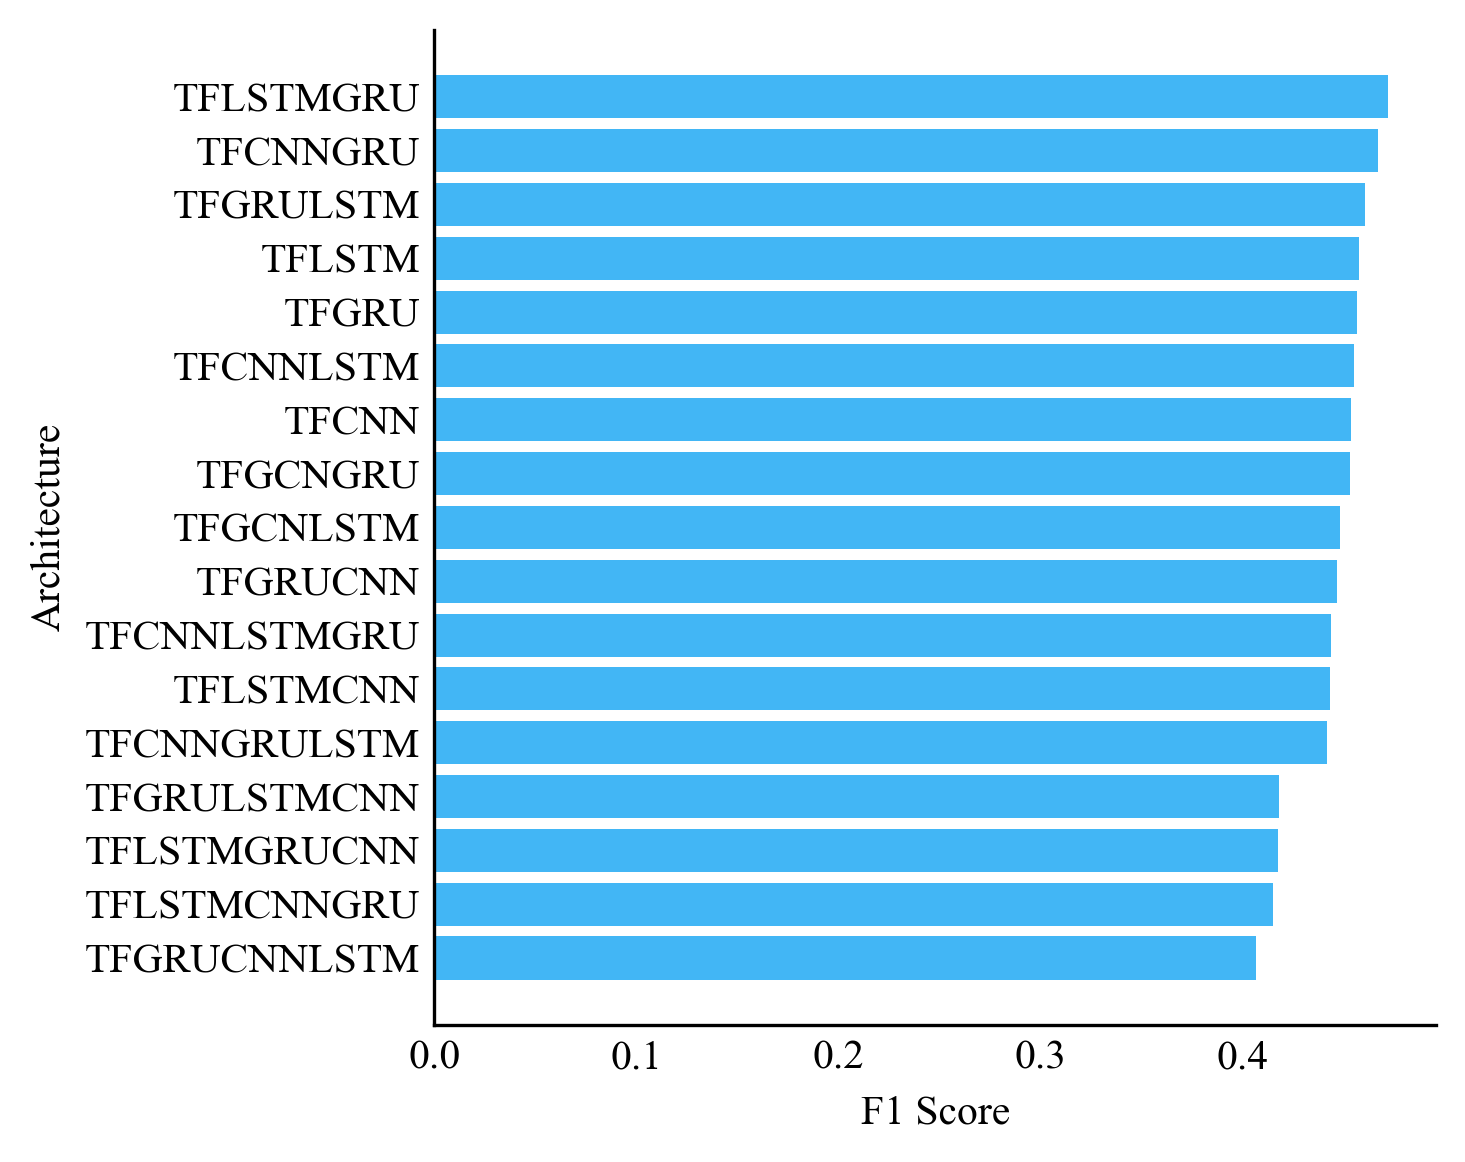

In [18]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('f1', ascending=True)
print(df)
plt.barh(df['arch'], df['f1'], color='#42b6f5')
plt.xlabel('F1 Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

In [19]:
df_result_sort = df_result.sort_values(by=['f1', 'acc', 'mape', 'rmse', 'mse', 'r2'], ascending=[False, False, True, True, True, False])
print(df_result_sort)
df_result_sort.to_excel('df_result_sort.xlsx', index=False)

       code                      sector  lookback          arch        r2  \
5307   SRIL  Barang Konsumen Non-Primer         5         TFGRU -0.426293   
154    NANO      Barang Konsumen Primer         5      TFCNNGRU  0.132910   
5310   SRIL  Barang Konsumen Non-Primer         5        TFLSTM  0.294858   
9139   JKSW                 Barang Baku         5     TFGCNLSTM  0.166069   
5312   SRIL  Barang Konsumen Non-Primer         5     TFLSTMGRU  0.296663   
...     ...                         ...       ...           ...       ...   
11606  BLTA                Transportasi         5  TFCNNLSTMGRU  0.487456   
11600  BLTA                Transportasi         5        TFLSTM  0.464363   
11601  BLTA                Transportasi         5     TFLSTMCNN -0.134963   
11610  BLTA                Transportasi         5  TFGRUCNNLSTM -0.190911   
11603  BLTA                Transportasi         5      TFGCNGRU -0.547597   

               mse       rmse      mape       acc        f1  
5307     51.5